In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
import json

path = '../code/NOSE_results_single_sample.json'
path = '../code/NOSE_results.json'

# DIffernces
# - addd 2 * x in hidden state
# - using 10 samples

with open(path) as f:
    data = json.load(f)

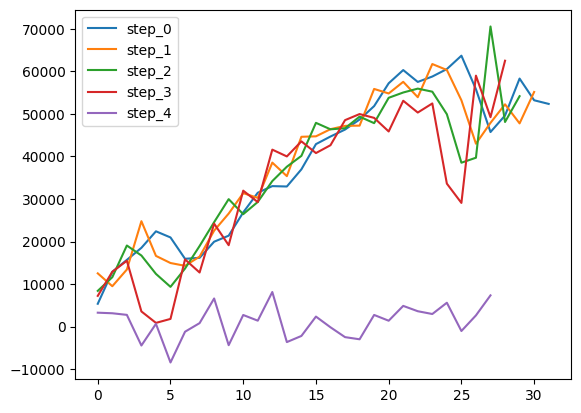

In [3]:
step_list = []
for key, value in data.items():
    step_list.append(key)
    data_plot = data[key]['transfer_entropy'].values()
    plt.plot(data_plot)
    plt.legend(step_list)

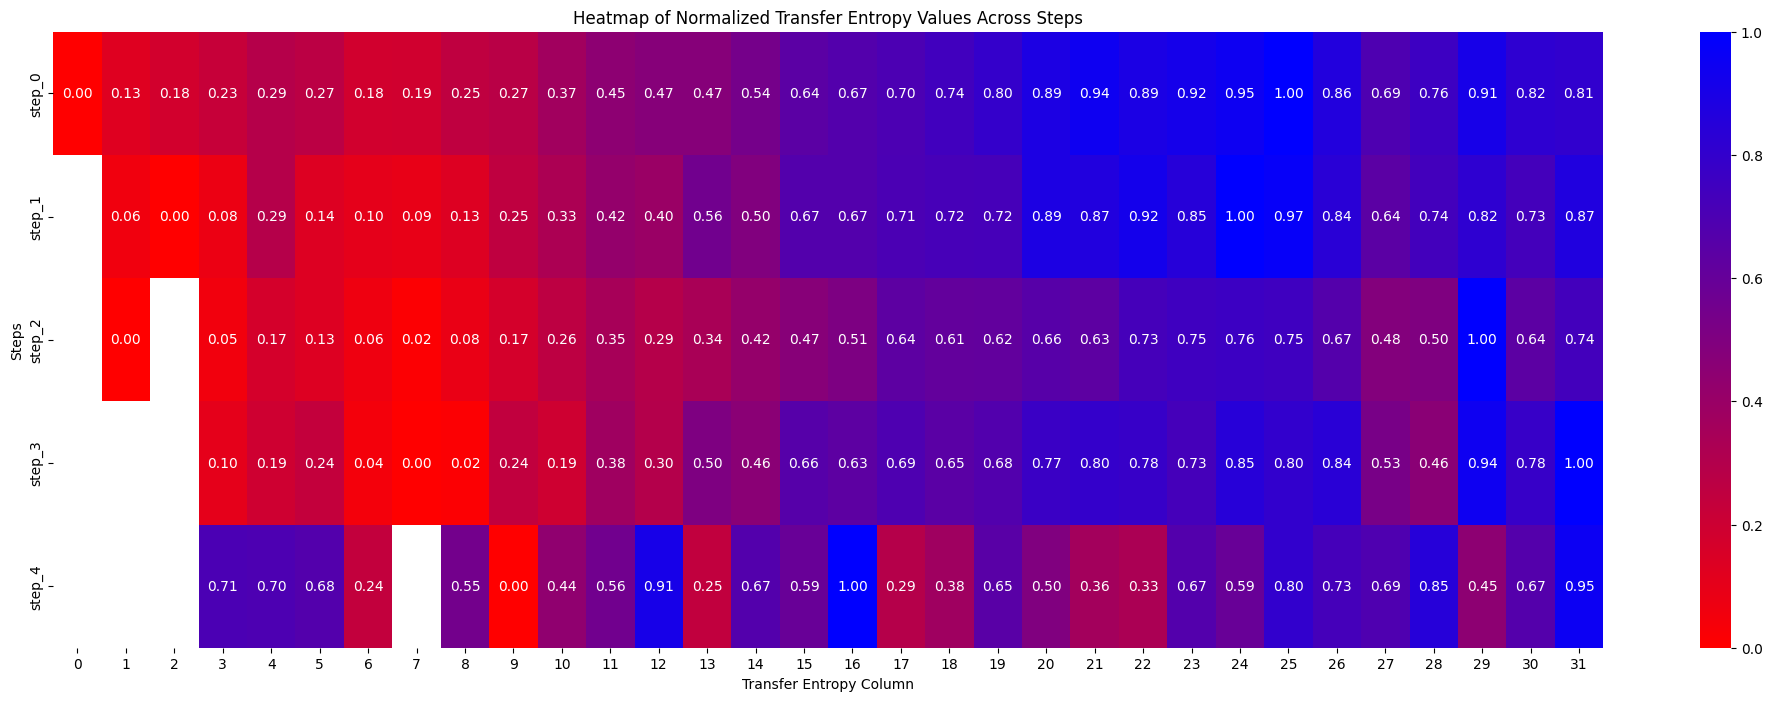

In [4]:
steps = list(data.keys())
columns = list(data['step_0']['transfer_entropy'].keys())
matrix = np.zeros((len(steps), len(columns)))

# Assume 'data' is already defined, and 'steps' and 'columns' are also defined as in your code

# Create the matrix
matrix = np.zeros((len(steps), len(columns)))

# Fill the matrix with transfer entropy values
for i, step in enumerate(steps):
    line = [data[step]['transfer_entropy'].get(str(col), np.nan) for col in columns]
    min_line, max_line = np.nanmin(line), np.nanmax(line)
    values = [(x - min_line) / (max_line - min_line) for x in line]
    matrix[i, :] = values


cmap = LinearSegmentedColormap.from_list("two_colors", ["red", "blue"])

plt.figure(figsize=(25, 8))
sns.heatmap(matrix, xticklabels=columns, yticklabels=steps, cmap=cmap, annot=True, fmt=".2f")
plt.xlabel('Transfer Entropy Column')
plt.ylabel('Steps')
plt.title('Heatmap of Normalized Transfer Entropy Values Across Steps')
plt.show()


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (32).

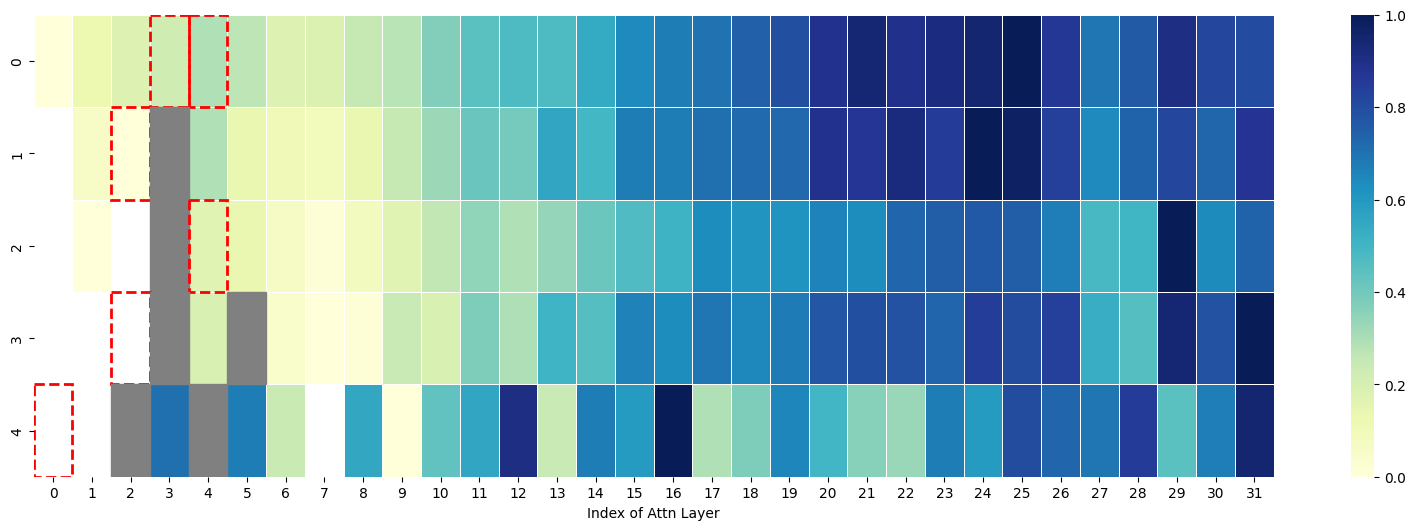

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data structure as provided


steps = list(data.keys())
columns = list(data['step_0']['transfer_entropy'].keys())

# Create the matrix
matrix = np.zeros((len(steps), len(columns)))

# Fill the matrix with transfer entropy values
for i, step in enumerate(steps):
    line = [data[step]['transfer_entropy'].get(str(col), np.nan) for col in columns]
    min_line, max_line = np.nanmin(line), np.nanmax(line)
    values = [(x - min_line) / (max_line - min_line) for x in line]
    matrix[i, :] = values

# Create the plot
plt.figure(figsize=(20, 6))
sns.heatmap(matrix, annot=False, cmap='YlGnBu', cbar=True, vmin=0, vmax=1, linewidths=.5)

# Add dashed red borders and black diagonal patterns where needed
for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        if ((y == 0 and x in [3, 4]) or
            (y == 1 and x == 2) or
            (y == 2 and x == 4) or
            (y == 3 and x == 2) or
            (y == 4 and x == 0)):
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='red', linestyle='--', linewidth=2))
        if ((y == 1 and x == 3) or
            (y == 2 and x == 3) or
            (y == 3 and x in [3, 5]) or
            (y == 4 and x in [2, 4]) or
            (y == 5 and x in [1, 3, 5])):
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color='grey', hatch='x'))

# Labels and title
plt.xlabel('Index of Attn Layer')
plt.ylabel('')
plt.yticks(np.arange(matrix.shape[0]) + 0.5, labels=columns, rotation=0)
plt.title('Visualization of the proposed NOSE', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
